# Create Candlestick Chart with Moving Averages

In [1]:
#install libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import numpy as np
import warnings

In [2]:
def candlestick_chart(ticker, period, interval):
    data = yf.download(ticker, period = period, interval = interval)

    # Preparing the data for the candlestick chart
    data.reset_index(inplace=True)
    data['Date'] = data['Date'].map(mdates.date2num)

    # Calculate moving averages
    data['20d_MA'] = data['Close'].rolling(window=20).mean()
    data['50d_MA'] = data['Close'].rolling(window=50).mean()
    data['100d_MA'] = data['Close'].rolling(window=100).mean()
    data['200d_MA'] = data['Close'].rolling(window=200).mean()

    fig, ax = plt.subplots(figsize=(20, 10))

    # Plotting the candlestick chart
    candlestick_ohlc(ax, data[['Date', 'Open', 'High', 'Low', 'Close']].values, width=0.6, colorup='g', colordown='r')

    # Plotting moving averages with labels
    ax.plot(data['Date'], data['20d_MA'], label='20-Day MA', linewidth=2)
    ax.plot(data['Date'], data['50d_MA'], label='50-Day MA', linewidth=2)
    ax.plot(data['Date'], data['100d_MA'], label='100-Day MA', linewidth=2)
    ax.plot(data['Date'], data['200d_MA'], label='200-Day MA', linewidth=2)


    # Creating a secondary axis for volume
    ax2 = ax.twinx()

    # Scaling the volume axis
    max_volume = data['Volume'].max()
    ax2.set_ylim(0, 5*max_volume)

    # Plotting volume as bars with a label
    ax2.bar(data['Date'], data['Volume'], width=0.5, color='blue', alpha=0.3, label='Volume')

    # Formatting the x-axis
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Labels and title
    plt.xlabel('Date')
    ax.set_ylabel('Price $')
    ax2.set_ylabel('Volume')
    plt.title(f'{ticker} Stock Candlestick Chart')
    plt.xticks(rotation=45)

    # Adding a manual legend entry for the candlesticks
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color='g', lw=4, label='Candlestick'),
                       Line2D([0], [0], color='blue', lw=4, label='Volume', alpha=0.3)] + ax.lines
    ax.legend(handles=legend_elements, loc='upper left')

    warnings.filterwarnings('ignore')

    # Show plot
    plt.show()

[*********************100%%**********************]  1 of 1 completed


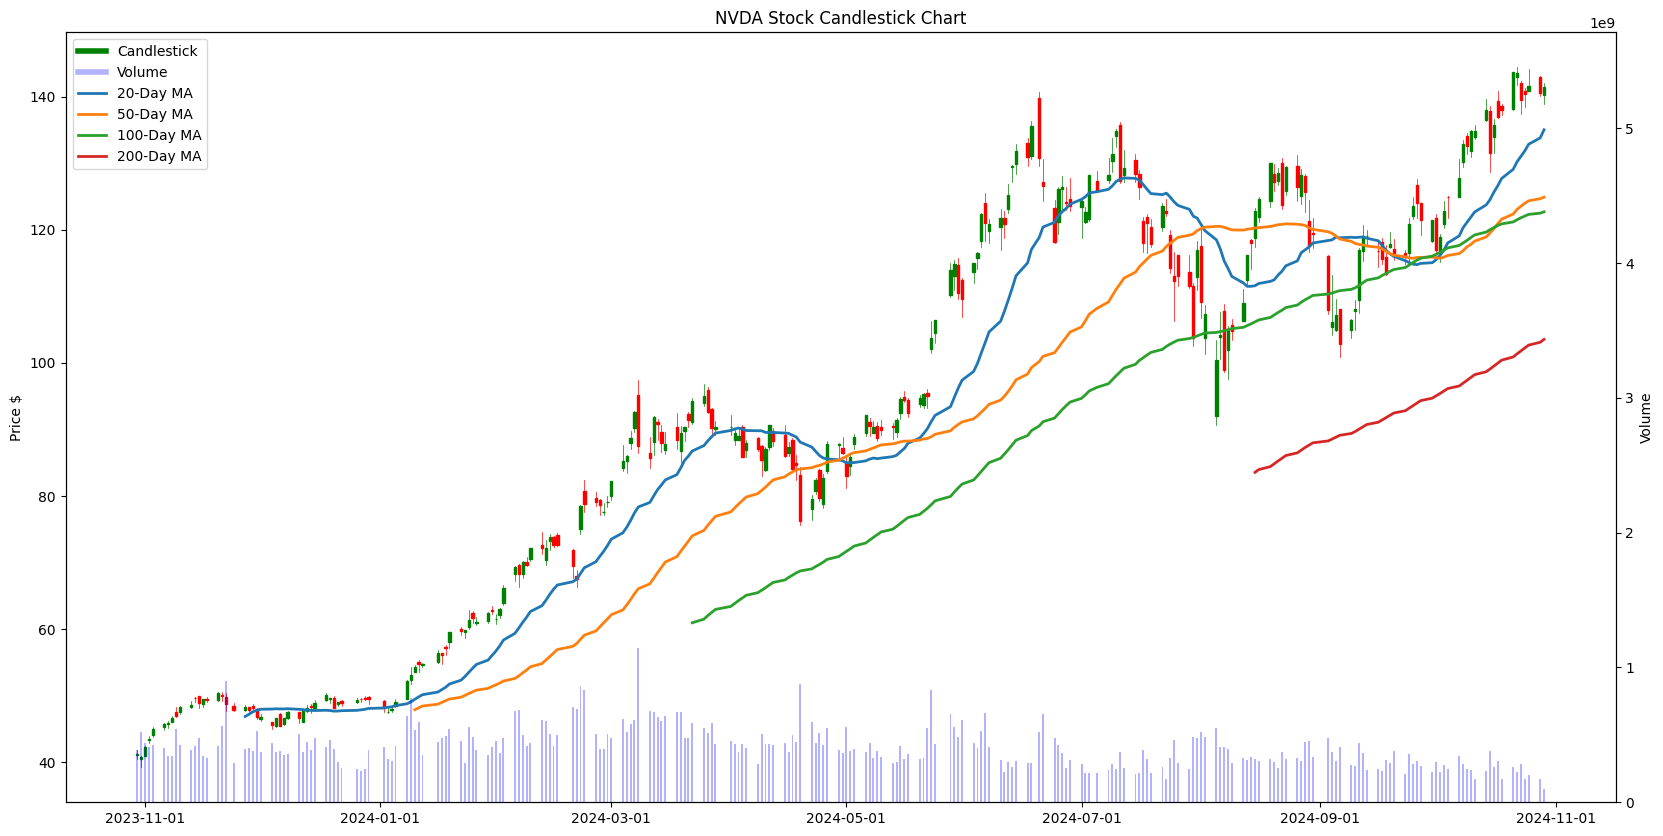

In [4]:
candlestick_chart("NVDA", "1y", "1d")